In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CONCENTRATION: 10 mM

In [11]:
def filter_and_save_csv_files(base_dir_protein, base_dir_ternary, file_name, replicas, value_threshold):
    """
    Filter CSV files based on given conditions and value threshold, then save the filtered data to new CSV files.

    Parameters:
    - base_dir_protein: str, base directory for the protein condition.
    - base_dir_ternary: str, base directory for the ternary condition.
    - file_name: str, the CSV file name to look for in each replica directory.
    - replicas: int, the number of replicas for each condition.
    - value_threshold: float, the threshold value to filter the 'value' column.
    """
    conditions = {
        'protein': base_dir_protein,
        'ternary': base_dir_ternary
    }
    
    for condition, base_dir in conditions.items():
        for replica in range(1, replicas + 1):
            # Construct the path to the replica folder
            replica_folder = os.path.join(base_dir, f"Replica{replica}")
            # Check if the folder exists
            if not os.path.exists(replica_folder):
                print(f"Folder {replica_folder} does not exist.")
                continue
            
            # Construct the path to the CSV file
            file_path = os.path.join(replica_folder, file_name)
            if os.path.exists(file_path):
                df = pd.read_csv(file_path)
                
                # Filter the DataFrame based on the value threshold
                filtered_df = df[df['value'] > value_threshold]
                
                # Save the filtered DataFrame to a new CSV file
                filtered_file_path = os.path.join(replica_folder, 'water_bridges_filtered.csv')
                filtered_df.to_csv(filtered_file_path, index=False)
                print(f"Filtered data saved to {filtered_file_path}")
            else:
                print(f"File {file_path} does not exist.")

# Example usage
base_dir_protein = '/home/mariona/project/1-Apo-FRAP'
base_dir_ternary = '/home/mariona/project/2-Frap-Lig'
file_name = 'water_bridges_all_residues.csv'
replicas = 3
value_threshold = 0.2

filter_and_save_csv_files(base_dir_protein, base_dir_ternary, file_name, replicas, value_threshold)

Filtered data saved to /home/mariona/project/1-Apo-FRAP/Replica1/water_bridges_filtered.csv
Filtered data saved to /home/mariona/project/1-Apo-FRAP/Replica2/water_bridges_filtered.csv
Filtered data saved to /home/mariona/project/1-Apo-FRAP/Replica3/water_bridges_filtered.csv
Filtered data saved to /home/mariona/project/2-Frap-Lig/Replica1/water_bridges_filtered.csv
Filtered data saved to /home/mariona/project/2-Frap-Lig/Replica2/water_bridges_filtered.csv
Filtered data saved to /home/mariona/project/2-Frap-Lig/Replica3/water_bridges_filtered.csv


In [12]:
def load_filtered_data(base_dir_protein, base_dir_ternary, replicas):
    """
    Load filtered CSV files for each condition and replica.

    Parameters:
    - base_dir_protein: str, base directory for the protein condition.
    - base_dir_ternary: str, base directory for the ternary condition.
    - replicas: int, the number of replicas for each condition.

    Returns:
    - data: dict of pandas DataFrames, containing the data for each condition and replica.
    """
    conditions = {
        'Apo': base_dir_protein,
        'Ternary': base_dir_ternary
    }
    
    data = {'Apo': [], 'Ternary': []}
    
    for condition, base_dir in conditions.items():
        for replica in range(1, replicas + 1):
            # Construct the path to the filtered CSV file
            replica_folder = os.path.join(base_dir, f"Replica{replica}")
            filtered_file_path = os.path.join(replica_folder, 'water_bridges_filtered.csv')
            if os.path.exists(filtered_file_path):
                df = pd.read_csv(filtered_file_path)
                df['replica'] = f'Replica{replica}'  # Add a column to identify the replica
                data[condition].append(df)
            else:
                print(f"File {filtered_file_path} does not exist.")
    
    # Concatenate the data for each condition into a single DataFrame
    data['Apo'] = pd.concat(data['Apo'], ignore_index=True)
    data['Ternary'] = pd.concat(data['Ternary'], ignore_index=True)
    
    return data

# Example usage
base_dir_protein = '/home/mariona/project/1-Apo-FRAP'
base_dir_ternary = '/home/mariona/project/2-Frap-Lig'
replicas = 3

data = load_filtered_data(base_dir_protein, base_dir_ternary, replicas)

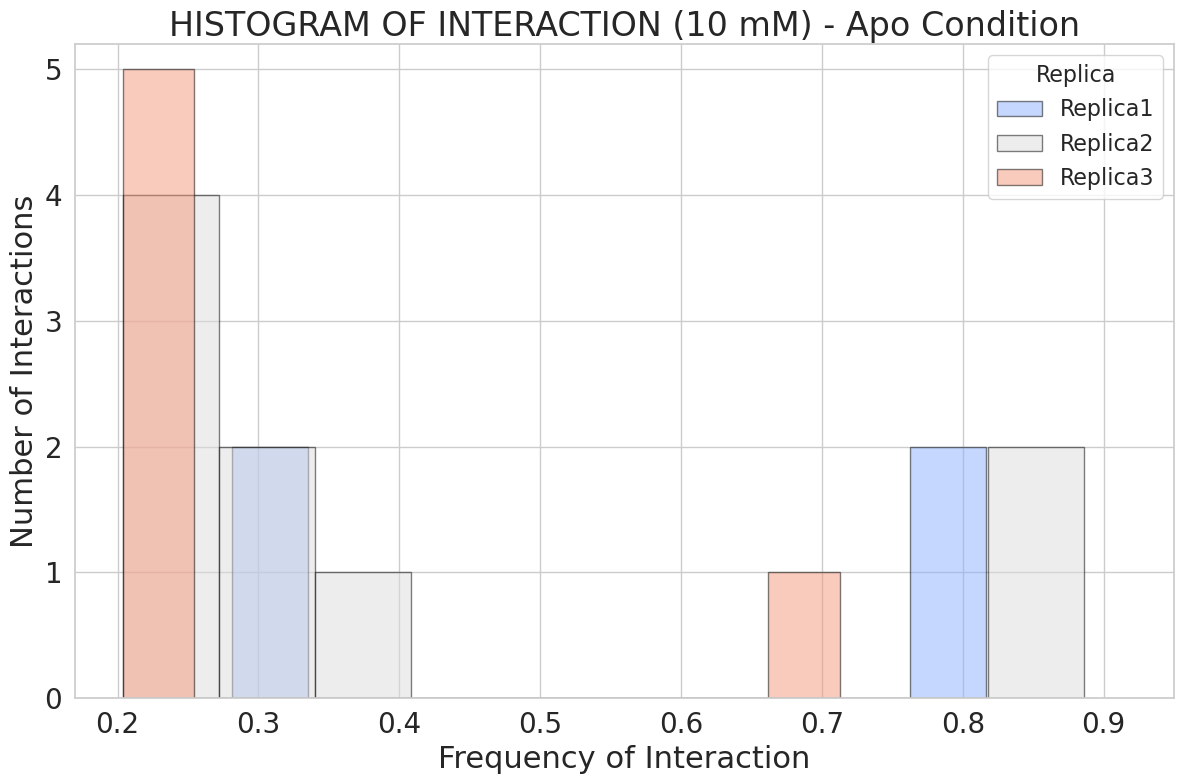

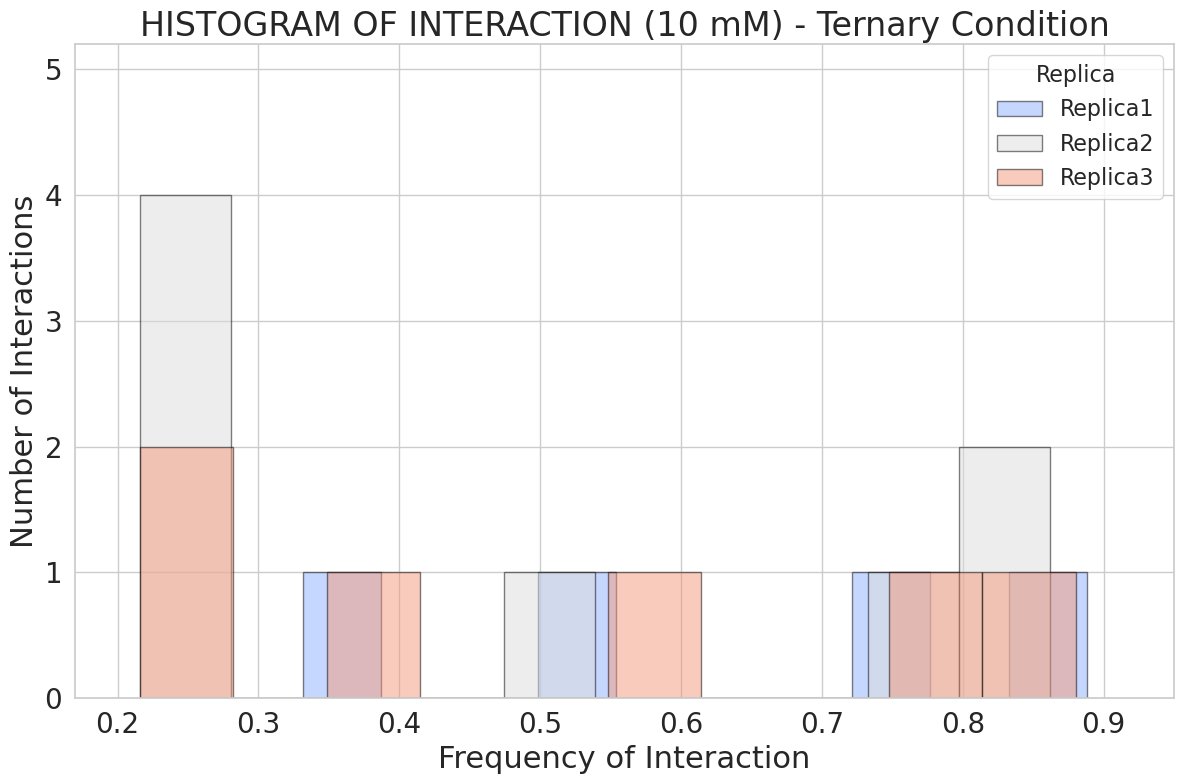

In [13]:
def plot_interaction_histograms(data):
    """
    Plot interaction values histograms for each condition with replicas differentiated by color.

    Parameters:
    - data: dict of pandas DataFrames, containing the data for each condition and replica.
    """
    sns.set(style="whitegrid")
    
    for condition, df in data.items():
        plt.figure(figsize=(12, 8))
        
        # Create a different color palette (e.g., 'coolwarm')
        palette = sns.color_palette("coolwarm", n_colors=df['replica'].nunique())
        
        # Plot histograms manually for each replica
        for replica in df['replica'].unique():
            subset = df[df['replica'] == replica]
            plt.hist(subset['value'], bins=10, alpha=0.5, label=replica, 
                     color=palette[df['replica'].unique().tolist().index(replica)], 
                     edgecolor='black')
        
        # Set the x-axis limit to be the same for all plots
        plt.xlim(0.17, 0.95)
        plt.ylim(0.0, 5.2)
        
        plt.title(f'HISTOGRAM OF INTERACTION (10 mM) - {condition.capitalize()} Condition', fontsize=24)
        plt.xlabel('Frequency of Interaction', fontsize=22)
        plt.ylabel('Number of Interactions', fontsize=22)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend(title='Replica', fontsize=16, title_fontsize=16)
        plt.tight_layout()
        plt.show()

# Example usage
base_dir_protein = '/home/mariona/project/1-Apo-FRAP'
base_dir_ternary = '/home/mariona/project/2-Frap-Lig'
replicas = 3

data = load_filtered_data(base_dir_protein, base_dir_ternary, replicas)
plot_interaction_histograms(data)

In [31]:
# CONCENTRATION: 150 mM

In [14]:
def filter_and_save_csv_files(base_dir_protein, base_dir_ternary, replicas, threshold=0.2):
    """
    Filter and save CSV files for each condition and replica.

    Parameters:
    - base_dir_protein: str, base directory for the protein condition.
    - base_dir_ternary: str, base directory for the ternary condition.
    - replicas: int, the number of replicas for each condition.
    - threshold: float, the value threshold for filtering interactions.
    """
    conditions = {
        'Apo': base_dir_protein,
        'Ternary': base_dir_ternary
    }
    
    for condition, base_dir in conditions.items():
        for replica in range(1, replicas + 1):
            # Construct the path to the original CSV file
            replica_folder = os.path.join(base_dir, f"Replica{replica}_2")
            input_file_path = os.path.join(replica_folder, 'water_bridges_all_residues.csv')
            
            if os.path.exists(input_file_path):
                df = pd.read_csv(input_file_path)
                
                # Filter the DataFrame
                filtered_df = df[df['value'] > threshold]
                
                # Save the filtered DataFrame to a new CSV file
                filtered_file_path = os.path.join(replica_folder, 'water_bridges_filtered.csv')
                filtered_df.to_csv(filtered_file_path, index=False)
                print(f"Filtered data saved to {filtered_file_path}")
            else:
                print(f"File {input_file_path} does not exist.")

# Example usage
base_dir_protein = '/home/mariona/project/1-Apo-FRAP'
base_dir_ternary = '/home/mariona/project/2-Frap-Lig'
replicas = 3
filter_and_save_csv_files(base_dir_protein, base_dir_ternary, replicas)

Filtered data saved to /home/mariona/project/1-Apo-FRAP/Replica1_2/water_bridges_filtered.csv
Filtered data saved to /home/mariona/project/1-Apo-FRAP/Replica2_2/water_bridges_filtered.csv
Filtered data saved to /home/mariona/project/1-Apo-FRAP/Replica3_2/water_bridges_filtered.csv
Filtered data saved to /home/mariona/project/2-Frap-Lig/Replica1_2/water_bridges_filtered.csv
Filtered data saved to /home/mariona/project/2-Frap-Lig/Replica2_2/water_bridges_filtered.csv
Filtered data saved to /home/mariona/project/2-Frap-Lig/Replica3_2/water_bridges_filtered.csv


In [15]:
def load_filtered_data(base_dir_protein, base_dir_ternary, replicas):
    """
    Load filtered CSV files for each condition and replica.

    Parameters:
    - base_dir_protein: str, base directory for the protein condition.
    - base_dir_ternary: str, base directory for the ternary condition.
    - replicas: int, the number of replicas for each condition.

    Returns:
    - data: dict of pandas DataFrames, containing the data for each condition and replica.
    """
    conditions = {
        'Apo': base_dir_protein,
        'Ternary': base_dir_ternary
    }
    
    data = {'Apo': [], 'Ternary': []}
    
    for condition, base_dir in conditions.items():
        for replica in range(1, replicas + 1):
            # Construct the path to the filtered CSV file
            replica_folder = os.path.join(base_dir, f"Replica{replica}_2")
            filtered_file_path = os.path.join(replica_folder, 'water_bridges_filtered.csv')
            if os.path.exists(filtered_file_path):
                df = pd.read_csv(filtered_file_path)
                df['replica'] = f'Replica{replica}'  # Add a column to identify the replica
                data[condition].append(df)
            else:
                print(f"File {filtered_file_path} does not exist.")
    
    # Filter out empty DataFrames and DataFrames with all-NA columns
    filtered_data = [df for df in data['Apo'] if not df.empty and not df.isna().all(axis=None)]
    
    # Concatenate the data for each condition into a single DataFrame
    data['Apo'] = pd.concat(data['Apo'], ignore_index=True)
    data['Ternary'] = pd.concat(data['Ternary'], ignore_index=True)
    
    return data

data = load_filtered_data(base_dir_protein, base_dir_ternary, replicas)

/tmp/ipykernel_74755/1564528089.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data['Apo'] = pd.concat(data['Apo'], ignore_index=True)


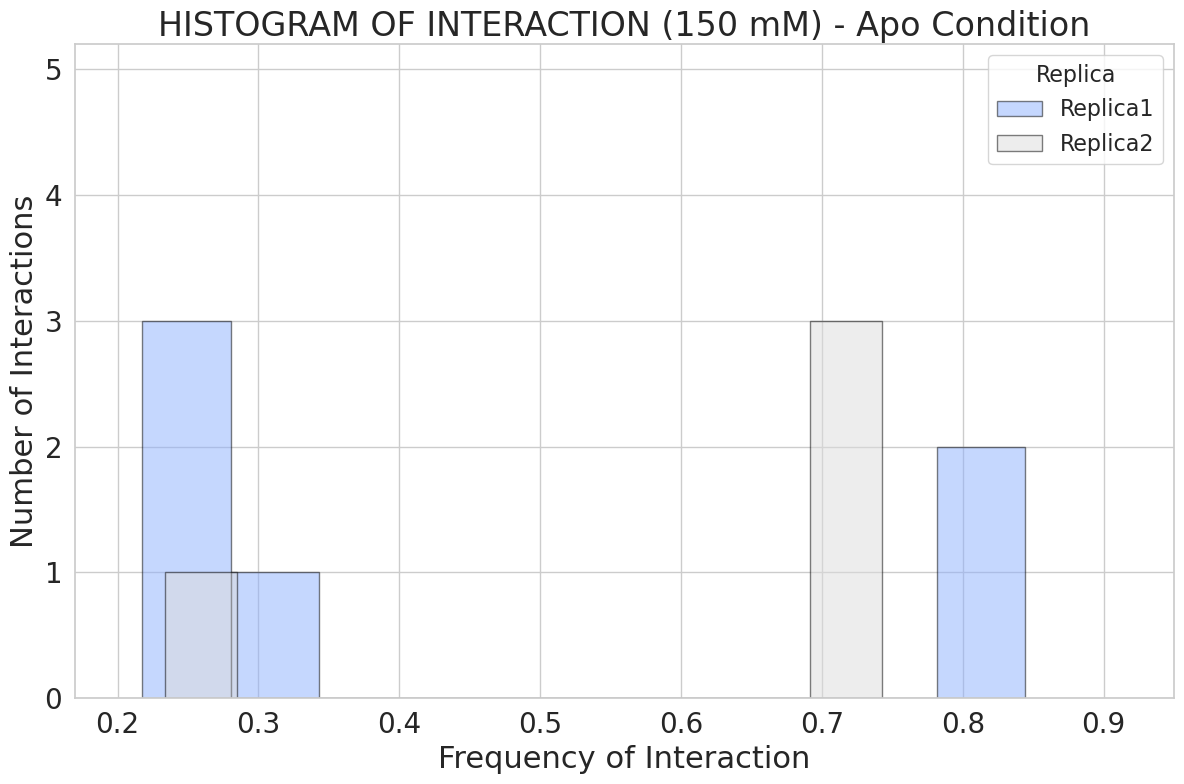

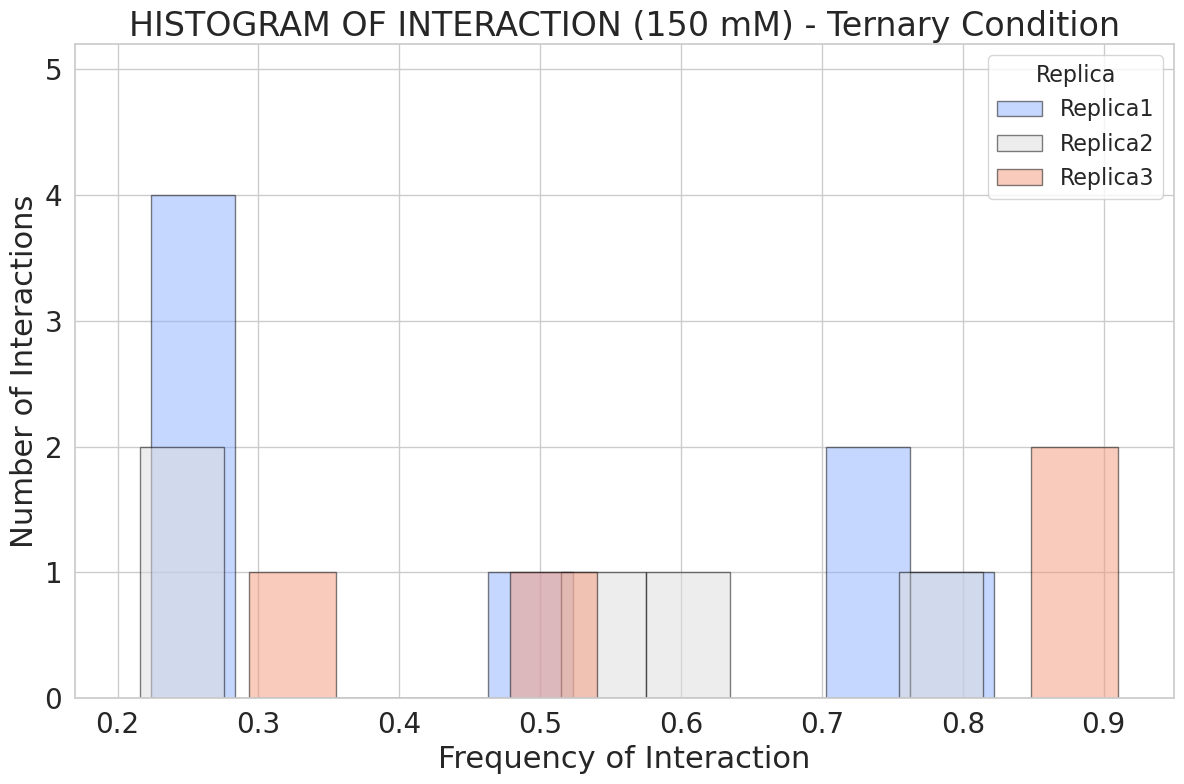

In [17]:
def plot_interaction_histograms(data):
    """
    Plot interaction values histograms for each condition with replicas differentiated by color.

    Parameters:
    - data: dict of pandas DataFrames, containing the data for each condition and replica.
    """
    sns.set(style="whitegrid")

    # Step 1: Determine all unique replicas across all conditions
    all_replicas = sorted({replica for df in data.values() for replica in df['replica'].unique()})

    # Step 2: Create a consistent color palette for all replicas
    palette = sns.color_palette("coolwarm", n_colors=len(all_replicas))
    color_mapping = {replica: palette[i] for i, replica in enumerate(all_replicas)}
    
    # Step 3: Plot histograms with consistent colors across conditions
    for condition, df in data.items():
        plt.figure(figsize=(12, 8))
        
        for replica in df['replica'].unique():
            subset = df[df['replica'] == replica]
            plt.hist(subset['value'], bins=10, alpha=0.5, label=replica, 
                     color=color_mapping[replica],  # Use the consistent color mapping
                     edgecolor='black')

        # Set the x-axis limit to be the same for all plots
        plt.xlim(0.17, 0.95)
        plt.ylim(0.0, 5.2)
        
        plt.title(f'HISTOGRAM OF INTERACTION (150 mM) - {condition.capitalize()} Condition', fontsize=24)
        plt.xlabel('Frequency of Interaction', fontsize=22)
        plt.ylabel('Number of Interactions', fontsize=22)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend(title='Replica', fontsize=16, title_fontsize=16)
        plt.tight_layout()
        plt.show()

# Example usage
# data = {'Apo': pd.DataFrame(...), 'Ternary': pd.DataFrame(...)}
plot_interaction_histograms(data)
